In [ ]:
import tensorflow as tf
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
# Get the data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(60000, 60000, 10000, 10000)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
import pandas as pd
pd.Series(y_train).value_counts()

,count
9,6000
0,6000
3,6000
2,6000
7,6000
5,6000
1,6000
6,6000
4,6000
8,6000


In [ ]:
# Get how many labels are there
len(np.unique(y_train))

10

In [ ]:
y_labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]
len(y_labels)

10

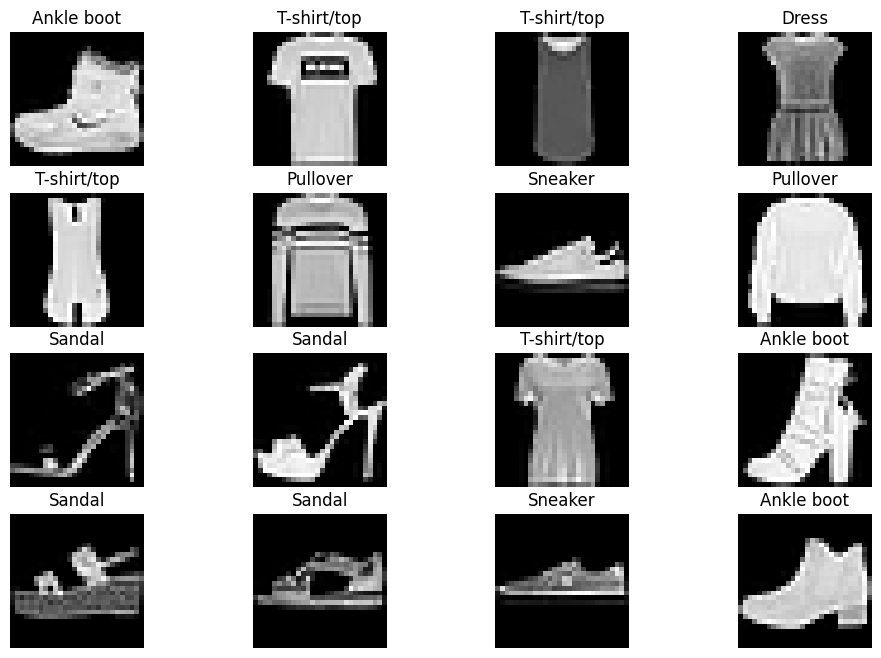

In [ ]:
# Visualize some of the data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.imshow(X_train[i], cmap="gray")
  plt.title(y_labels[y_train[i]])
  plt.axis(False)

In [ ]:
# Build a model

# Set the random seed
tf.random.set_seed(42)

# Create a model by using Sequential API
model_0 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, activation="relu"),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model_0.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,338 (52.10 KB)

 Trainable params: 13,338 (52.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fit the model
history_0 = model_0.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 24ms/step - accuracy: 0.7156 - loss: 1.1215
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 26ms/step - accuracy: 0.8548 - loss: 0.4066
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.8730 - loss: 0.3541
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 24ms/step - accuracy: 0.8840 - loss: 0.3180
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.8932 - loss: 0.2926
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 23ms/step - accuracy: 0.9010 - loss: 0.2741
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.9046 - loss: 0.2601
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9077 - loss: 0.2522
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9102 - loss: 0.2440
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 23ms/step - accuracy: 0.9131 - loss: 0.2370


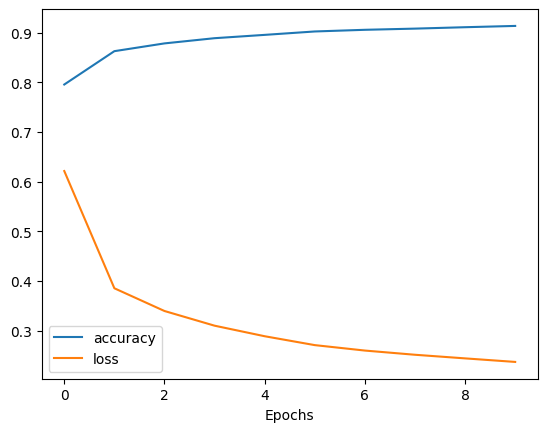

In [ ]:
import pandas as pd
pd.DataFrame(history_0.history).plot()
plt.xlabel("Epochs")
plt.show()

In [ ]:
model_0.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8922 - loss: 0.3415


[0.33316513895988464, 0.8901000022888184]

In [ ]:
y_preds = model_0.predict(X_test)
y_preds[:4]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[3.2250420e-12, 2.1776312e-13, 2.0605578e-08, 2.2288872e-15,
        7.6573643e-11, 1.7441693e-04, 4.9944304e-13, 1.2307398e-05,
        3.5813373e-11, 9.9981332e-01],
       [5.2101331e-07, 7.3348695e-11, 9.9999613e-01, 8.5800401e-08,
        4.0050315e-07, 5.3300281e-12, 2.7252740e-06, 1.2114693e-14,
        2.5079632e-09, 4.2207729e-10],
       [2.7650690e-10, 9.9999994e-01, 5.5714815e-11, 3.4914587e-09,
        8.4297597e-13, 7.0718238e-17, 3.8880113e-13, 7.9213281e-19,
        1.8928761e-08, 3.2025655e-14],
       [1.9510915e-10, 9.9999994e-01, 9.0343726e-11, 1.8514619e-09,
        2.6134559e-09, 2.2079975e-14, 2.8193499e-08, 2.7142274e-17,
        2.0406694e-11, 9.0851968e-14]], dtype=float32)

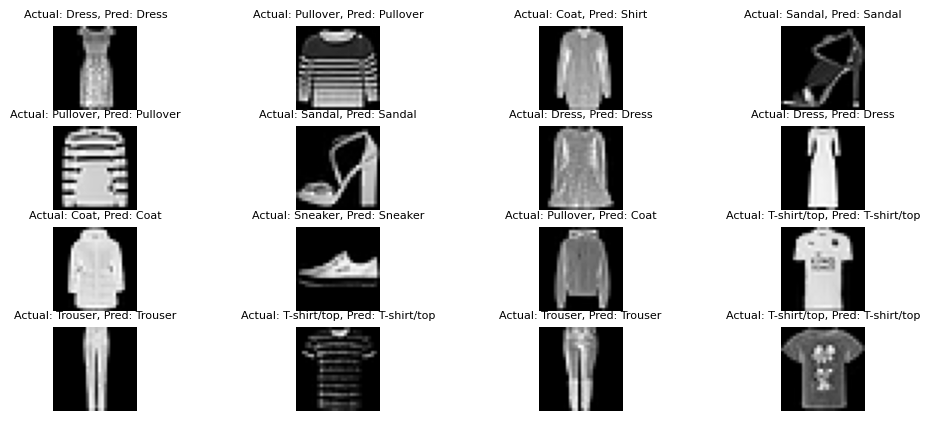

In [ ]:
# Visualizing preds
plt.figure(figsize=(12, 5))
for i in range(16):
  plt.subplot(4, 4, i+1)
  idx = random.randint(0, len(y_preds))
  plt.imshow(X_test[idx], cmap="gray")
  plt.title(f"Actual: {y_labels[y_test[idx]]}, Pred: {y_labels[tf.argmax(y_preds[idx])]}", size=8)
  plt.axis("off")
plt.show()

In [ ]:
wrong_preds = [i for i in range(len(y_preds) - 1) if tf.argmax(y_preds[i]).numpy() != y_test[i]]
len(wrong_preds), wrong_preds[:5]

(1098, [17, 23, 25, 32, 42])

In [ ]:
y_test.shape

(10000,)

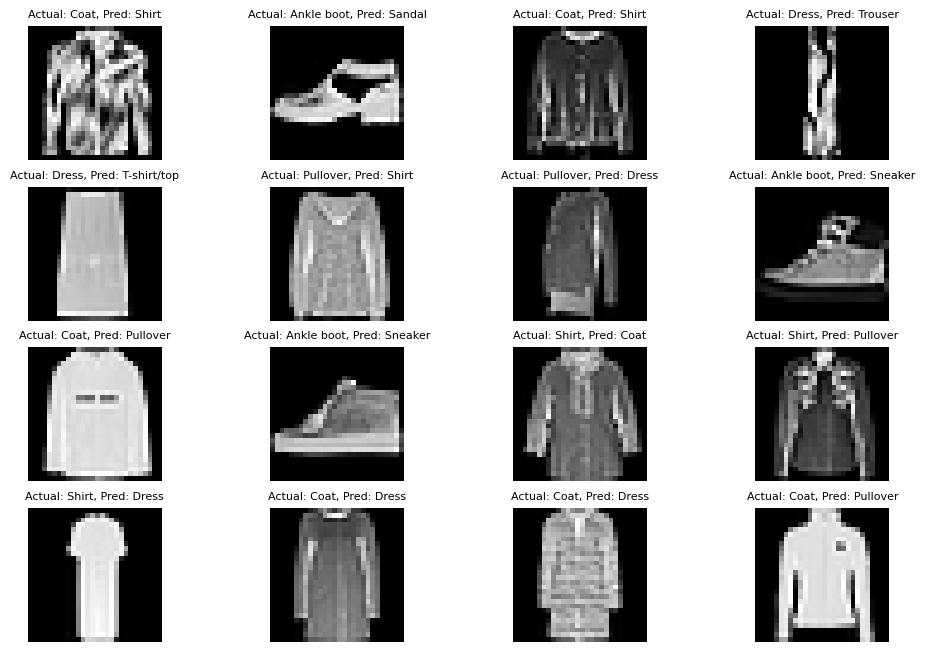

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.imshow(X_test[wrong_preds[i]], cmap="gray")
  plt.title(f"Actual: {y_labels[y_test[wrong_preds[i]]]}, Pred: {y_labels[tf.argmax(y_preds[wrong_preds[i]])]}", size=8)
  plt.axis("off")
plt.show()